# EE915: Week-5 - Project-5 - Naive Bayes - Purchase Prediction
**Name**: Venkateswar Reddy Melachervu </br>
**Roll No.**: 23156022 </br>
**Email**: vmela23@iitk.ac.in </br>
**Dataset**: Breast Cancer Data Set from sklearn </br>
**Professor**: Prof. Aditya K. Jagganatham </br>
**TAs**: Meesam and Priyanka </br>

This project implements naive Bayes algorithm for purchase prediction using the purchase data sets provided. The code includes pre-processing steps such as data normalization, feature selection, splitting the dataset into training. 

The Gaussian Naive Bayes classifier is used for purchase prediction. The evaluation metrics used include accuracy, F1 score, precision, recall, RoC/AuC, decision boundary etc. Additionally, Laplace smoothing is applied for better accuracy in prediction - particularly in the spam and ham classification of the emails dataset. 

&copy; Venkateswar Reddy Melachervu 2024. All rights reserved.


In [5]:
# Importing necessary libraries for breast cancer SVM classifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pandas as pd # for dataframe manipulation
from pandas.plotting import parallel_coordinates # for parallel coordinates plot of breast cancer data set
import matplotlib.pyplot as plt # for plotting graphs
from sklearn.manifold import TSNE # for t-SNE plot
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc, confusion_matrix, precision_score, recall_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from collections import Counter
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


ModuleNotFoundError: No module named 'sklearn'

In [8]:
# Define roll number, name, email
roll_number = "23156022" 
name = "Venkateswar Reddy Melachervu"
email = "vmela23@iitk.ac.in"

# Load purchase data set
purchase_ds = pd.read_csv('Purchase_Logistic.csv')

X = purchase_ds.iloc[:, [2, 3]].values
Y = purchase_ds.iloc[:, 4].values

# Scale the data using standard scaler
scaler = StandardScaler()
standard_scaled_X = scaler.fit_transform(X)

# Display metadata about the purchase data dataset
# Set display option to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

df = purchase_ds.columns.tolist()
# Print the column names
print(f"Column/feature names are: {df}")
target_column_index = 4
target_column = purchase_ds.columns[target_column_index]
# Print the target column name
print(f"Target column name is: {target_column}\n")

Column/feature names are: ['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']
Target column name is: Purchased



In [9]:
# Display the first row of the data set
print('First row of purchase data set is:')
print(purchase_ds.iloc[0].to_dict())

First row of purchase data set is:
{'User ID': 15624510, 'Gender': 'Male', 'Age': 19, 'EstimatedSalary': 19000, 'Purchased': 0}


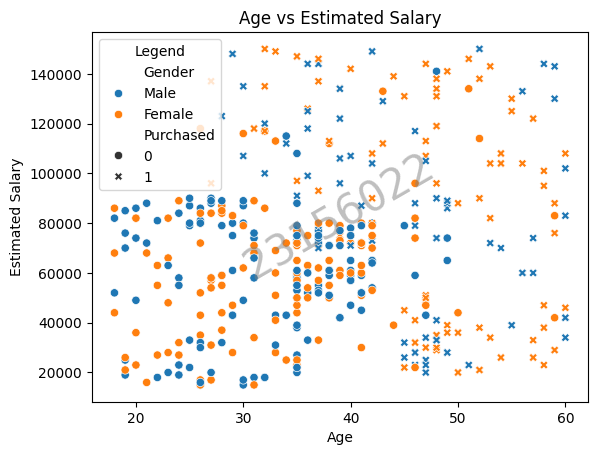

In [10]:
# Create a scatter plot for Age vs EstimatedSalary, colored by Gender and marked by Purchased status
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Gender', style='Purchased', data=purchase_ds)

# Optionally, add titles and labels
plt.title('Age vs Estimated Salary')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend(title='Legend')
# Add watermark
plt.text(0.5, 0.5, roll_number, fontsize=30, color='gray', alpha=0.5, ha='center', va='center', rotation=30, transform=plt.gca().transAxes)
plt.show()


In [11]:
# function to display confusion matrix plot with watermark - wama
def print_confusion_matrix_wama(cm, labels, plot_name, Y_test, wama='23156022'):
    # Calculate counts for each class in the test set
    class_counts = Counter(Y_test)

    # Print the counts
    print("Data Count in Test Set:")
    for class_label, count in class_counts.items():
        if class_label == 0:
            print(f"\tNot Purchased: {count}")
        elif class_label == 1:
            print(f"\tPurchased: {count}")
        else:
            pass

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(plot_name)

    # Add centered diagonal watermark
    plt.text(0.5, 0.5, wama, fontsize=50, color='gray', alpha=0.2,
             rotation=45, ha='center', va='center', transform=plt.gca().transAxes)

    plt.show()

Creating Naive Bayes Classifier...
Training the model...
Training Score:  0.8833333333333333
Making predictions...
Accuracy: 0.9
F1 Score: 0.8333333333333334
Printing Confusion Matrix...
Data Count in Test Set:
	Not Purchased: 68
	Purchased: 32


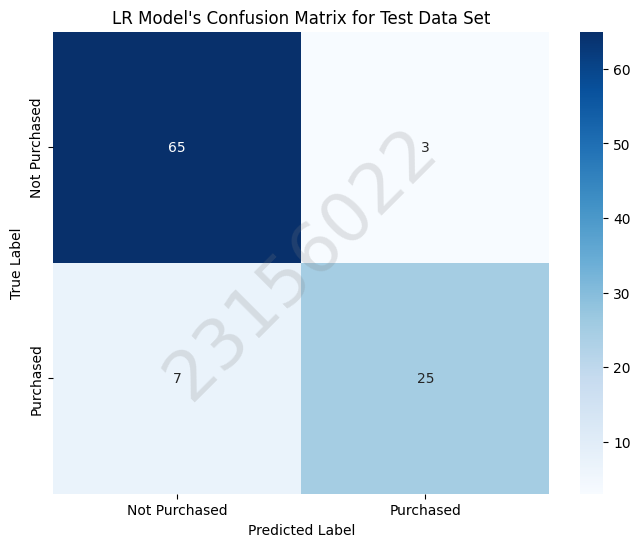

In [12]:
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)   

# Scale the data   
scaler = StandardScaler() 
X = scaler.fit_transform(X)
# Split the data across train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)   

# Create a Naive Bayes classifier
print('Creating Naive Bayes Classifier...')
# Create a Gaussian Naive Bayes classifier
naiveBayes = GaussianNB()

# Train the classifier
print('Training the model...')
naiveBayes.fit(X_train, Y_train)
print('Training Score: ', naiveBayes.score(X_train, Y_train))
# Make predictions
print('Making predictions...')
Y_pred = naiveBayes.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

# Create the Confusion Matrix and plot it with watermark
labels = ['Not Purchased', 'Purchased']  # replace with your actual class labels if different
plot_name = 'LR Model\'s Confusion Matrix for Test Data Set'
print('Printing Confusion Matrix...')
# confusion matrix
cmat = confusion_matrix(Y_test, Y_pred)
print_confusion_matrix_wama(cmat, labels, plot_name, Y_test)

Plotting ROC and Precision-Recall curves...


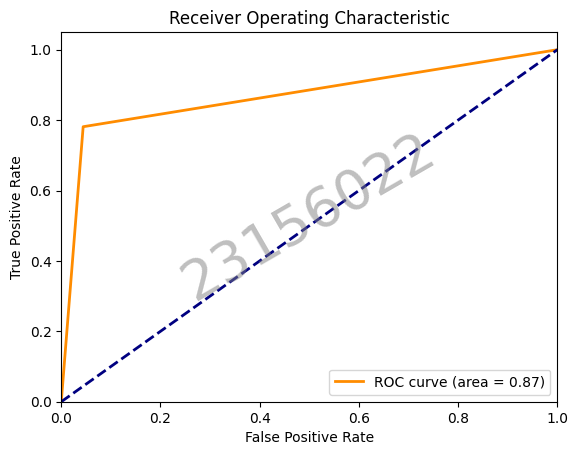

In [13]:
# Plot RoC curves
print('Plotting ROC and Precision-Recall curves...')
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.text(0.5, 0.5, roll_number, fontsize=40, color='gray', alpha=0.5, ha='center', va='center', rotation=30, transform=plt.gca().transAxes)
plt.show()

Plotting Precision-Recall curve...


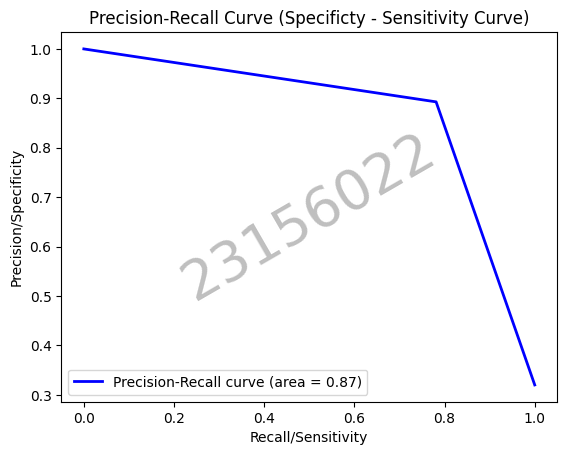

In [14]:
# Plot Precision-Recall curve
print('Plotting Precision-Recall curve...')
# Plot the Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred)
pr_auc = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall/Sensitivity')
plt.ylabel('Precision/Specificity')
plt.title('Precision-Recall Curve (Specificty - Sensitivity Curve)')
plt.legend(loc="lower left")
plt.text(0.5, 0.5, roll_number, fontsize=40, color='gray', alpha=0.5, ha='center', va='center', rotation=30, transform=plt.gca().transAxes)
plt.show()


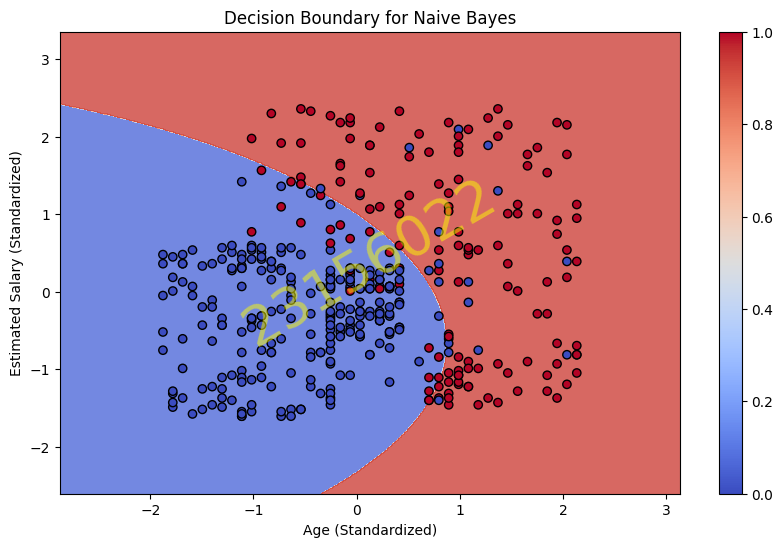

In [25]:
# Plot decision boundary

# Create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the classification
Z = naiveBayes.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel('Age (Standardized)')
plt.ylabel('Estimated Salary (Standardized)')
plt.title('Decision Boundary for Naive Bayes')
plt.colorbar()
plt.text(0.5, 0.5, roll_number, fontsize=40, color='yellow', alpha=0.5, ha='center', va='center', rotation=30, transform=plt.gca().transAxes)
plt.show()

In [26]:
!jupyter nbconvert --to pdf Proj_05_Naive_Bayes_Full_5.ipynb


[NbConvertApp] Converting notebook Proj_05_Naive_Bayes_Full_5.ipynb to pdf
[NbConvertApp] Support files will be in Proj_05_Naive_Bayes_Full_5_files\
[NbConvertApp] Making directory .\Proj_05_Naive_Bayes_Full_5_files
[NbConvertApp] Writing 48517 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | b had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 373463 bytes to Proj_05_Naive_Bayes_Full_5.pdf
